# Test of evaluation metrics

It is done using the skull_break dataset

The purpose is to try the methods and see how they work

## Importing libraries

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
from matplotlib import pyplot as plt
import numpy as np

from dataset import SKULLBREAKDataset

from pytorch_ssim.ssim import ssim_exact, ssim, ssim_3d, msssim, msssim_3d

from fid.medicalnet import pretrained_resnet_fid
from fid.fid import compute_stats_from_model, compute_fid, fid_from_activations, load_stats

import torch
from torch.utils.data import DataLoader, Subset

## Getting the data

In [3]:
dataset = SKULLBREAKDataset('../data/skull-break/train/nrrd/complete_skull')
len(dataset)

114

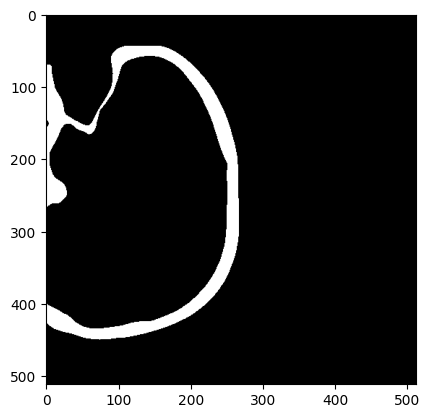

In [4]:
item1 = dataset[0]['data']
item2 = dataset[1]['data']

plt.imshow(item1.squeeze(0)[201], cmap='gray')
plt.show()

## SSIM

These snippets try the ssim and msssim scores for both 2d images and 3d images

In [10]:
ssim(item1[:, 200].unsqueeze(0).float(), item1[:, 200].unsqueeze(0).float())

tensor(1.)

In [11]:
ssim_3d(item1.unsqueeze(0).float(), item2.unsqueeze(0).float())

In [ ]:
msssim(item1[:, 200].unsqueeze(0).float(), item2[:, 200].unsqueeze(0).float())

tensor(0.7936)

In [ ]:
msssim_3d(item1.unsqueeze(0).float(), item2.unsqueeze(0).float())

tensor(0.8289)

## FID

### Pretrained Med3d

In [5]:
model_params = {
    'sample_input_D': item1.size(1),
    'sample_input_H': item1.size(2),
    'sample_input_W': item1.size(3),
    'num_seg_classes': 2,
    'no_cuda': True
}
model = pretrained_resnet_fid('resnet10', 'fid/pretrain/', **model_params)


In [6]:
out = model(item1.unsqueeze(0).float())

In [7]:
out.shape

torch.Size([1, 512])

In [10]:
import gc
del out
gc.collect()

### Computing stats

In [6]:
dataloader = DataLoader(Subset(dataset, torch.arange(2)), batch_size=1, shuffle=False, num_workers=2)

In [7]:
mu, sigma = compute_stats_from_model(model, dataloader, 'cpu', 'skull_break_test', 'fid/stats/', save=True)

Computing activations...


100%|██████████| 2/2 [04:17<00:00, 128.62s/it]


In [6]:
mu, sigma = load_stats('skull_break_test', 'fid/stats/')

In [7]:
compute_fid(mu, sigma, mu, sigma)

-1.8250680503707547e-09

In [11]:
random_act1 = np.random.random((10, 512))
random_act2 = np.random.random((10, 512))


In [16]:
fid_from_activations(random_act2, random_act2, '', '', '')

-1.30397602042219e-05

In [20]:
fid_from_activations(random_act1, random_act2, '', '', '')

85.08184937720851